### Craps Game Code

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import collections

In [6]:
def rollDice():
    # Returns a value 1-12 based on rolling two fair 6 sided dice
    return random.randint(1, 6) + random.randint(1, 6)

### Histogram dice rolls probability

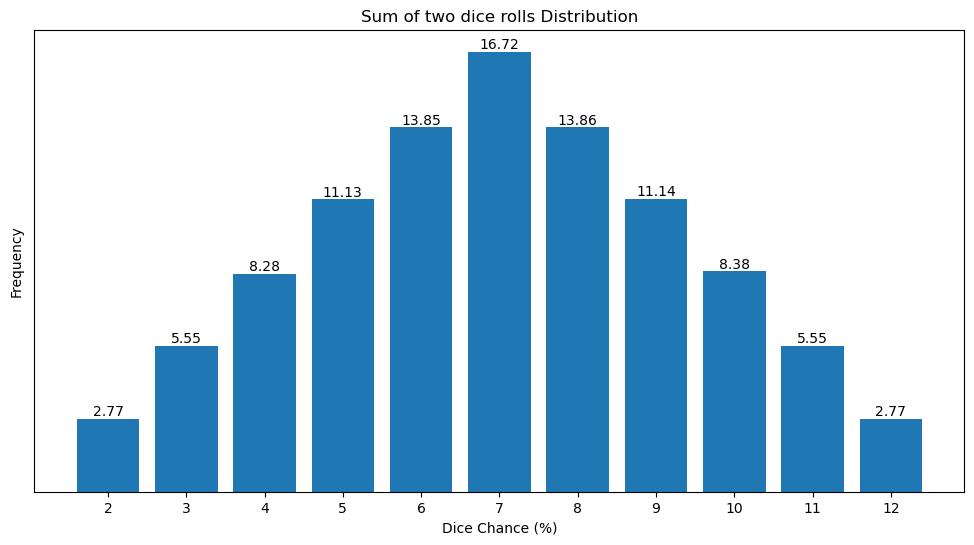

In [340]:
n = 999999
rolls = []

for i in range(n):
    rolls.append(rollDice())

fig, ax = plt.subplots()
c = collections.Counter(rolls)
c = sorted(c.items())
freq = [i[1] for i in c]
prob = [round((i[1] / len(rolls) * 100), 2) for i in c]
bar = plt.bar(range(2, 13), freq)
plt.title("Sum of two dice rolls Distribution")
plt.xlabel("Dice Chance (%)")
plt.ylabel("Frequency")
ax.bar_label(bar, labels = prob)
ax.set_xticks(range(2, 13))
ax.set_yticks([])
ax.set_xticklabels(range(2, 13))
fig.set_size_inches(12, 6)
plt.show()

In [348]:
print("Theoretical values: ")
print(round(1 / 36 * 100, 2), "%")
print(round(2 / 36 * 100, 2), "%")
print(round(3 / 36 * 100, 2), "%")
print(round(4 / 36 * 100, 2), "%")
print(round(5 / 36 * 100, 2), "%")
print(round(6 / 36 * 100, 2), "%")

Theoretical values: 
2.78 %
5.56 %
8.33 %
11.11 %
13.89 %
16.67 %


In [7]:
def roll2Dice():
    # returns a tuple of 2 rolls of die combo with unique values
    return(str(sorted((random.randint(1, 6), random.randint(1, 6))))[1:-1])

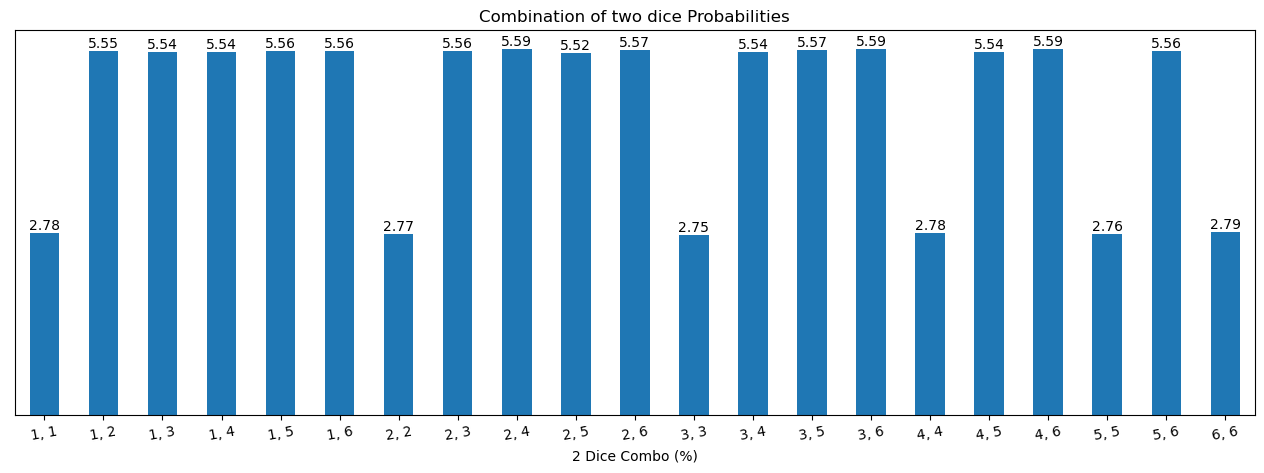

In [327]:
n = 999999
rolls = []

for i in range(n):
    # returns a tuple of 2 rolls of die combo with unique values
    rolls.append(roll2Dice())
    
c = collections.Counter(rolls)
c = sorted(c.items())
dice_combo = [i[0] for i in c]
freq = [i[1] for i in c]
prob = [round((i[1] / len(rolls) * 100), 2) for i in c]
df = pd.DataFrame({'Dice Combo': dice_combo,
                   'Value': freq,
                   'Probability': prob})
df.set_index('Dice Combo', inplace=True)
df.sort_values(['Dice Combo'], inplace=True) # add 'Value', to sort for better line
ax = df.iloc[:, 1].plot.bar(rot=5, figsize=(16, 5))
plt.xticks(rotation=10, horizontalalignment="center")
plt.title("Combination of two dice Probabilities")
plt.xlabel("2 Dice Combo (%)")
ax.bar_label(ax.containers[0])
ax.set_yticks([])
plt.ylabel("")
fig.set_size_inches(12, 6)

In [349]:
print("Theoretical values: ")
print(round(1 / 36 * 100, 2), "%")
print(round(2 / 36 * 100, 2), "%")

Theoretical values: 
2.78 %
5.56 %


## Analyzing Odds

When analyzing odds, we will start at 0 and change depending on if the bet wins or loses the balance. Each bet will be valued at 1. This way is more intuitive to view in graph (almost like random markov chain) form.
Of course, the theoretical probabilities are already known, so we will simulate further.

In [47]:
def analyzeBet(label, betFunc, n):
    # analyzes the monte carlo for a bet and function with long term probability
    #    label = (str) for title of bet
    #    betFunc = (func) bet function for return value of monte carlo long run
    #    n = (int) size for graph
    start = 0
    x = []
    for i in range(n):
        step = fieldBet()
        start = start + step
        x.append(start)
    eX = x[-1] / n
    plt.plot(x)
    plt.title(str(label + " for " + str(n) + " Steps\nE(X): " + str(round(eX, 4))))
    plt.xlabel('Steps')
    plt.ylabel(r'$S_{n}$')
    
    # Bigger n for closer true theoretical E(X)
    n = 1999999 # CHANGE BIGGER FOR CLOSER THEORETICAL VALUE, SMALLER FOR LESS COMPUTING TIME
    start = 0
    x = []
    for i in range(n):
        step = betFunc()
        start = start + step
        x.append(start)
    eX = x[-1] / n
    print(str(label + " for " + str(n) + " Steps\nE(X): " + str(round(eX, 4))))
    print("This means that for every $1, you will expect to roughly net " + str(round(eX, 2)) + " over the long run")
    print("The house has roughly a " + str(round(eX * -100, 2)) + "% house advantage")

### Any next roll

Betting on what the dice will be for the next roll

##### Field Bet

In [3]:
def fieldBet():
    # field: 
    #    (2x/3x win) 2, 12
    #    (win) 3, 4, 9, 10, 11
    #    (lose) 5, 6, 7, 8
    roll = rollDice()
    if roll == 12:
        return 3
    elif roll == 2:
        return 2
    elif roll in [3, 4, 9, 10, 11]:
        return 1
    else:
        return -1

Field Bet for 3999999 Steps
E(X): -0.028
This means that for every $1, you will expect to roughly net -0.03 over the long run
The house has roughly a 2.8% house advantage


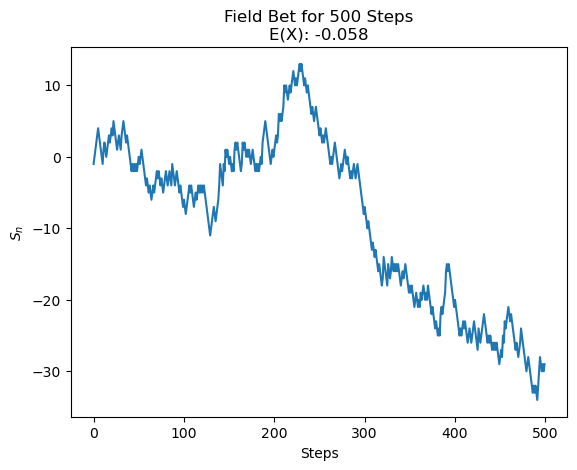

In [44]:
analyzeBet("Field Bet", fieldBet, 500)

### Craps

Bets on craps first and second roll

##### Pass line Bet

In [25]:
def passLineBet():
    # pass line: 
    #    first roll
    #    (win) 7, 11
    #    (lose) 2, 3, 12
    #    (continues) if rolled anything else
    firstRoll = rollDice()
    if firstRoll in [7, 11]:
        return 1
    elif firstRoll in [2, 3, 12]:
        return -1
    else:
        # pass line: 
        #    second roll
        #    (win) rolled same dice as first
        #    (lose) 7
        #    (repeats) if rolled anything else
        secondRoll = 0
        while secondRoll != 7: 
            secondRoll = rollDice()
            if secondRoll == firstRoll:
                return 1
        return -1

Pass line Bet for 3999999 Steps
E(X): -0.0143
This means that for every $1, you will expect to roughly net -0.01 over the long run
The house has roughly a 1.43% house advantage


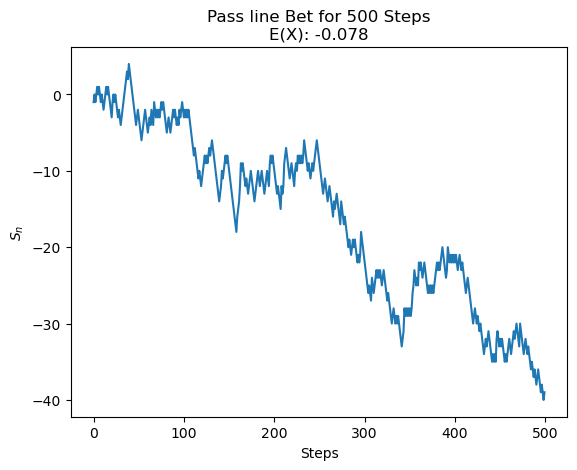

In [45]:
analyzeBet("Pass line Bet", passLineBet, 500)

##### Don't Pass (Don't Come)

In [30]:
def dontComeBet():
    # don't pass line: 
    #    first roll
    #    (win) 2, 3
    #    (lose) 2, 3
    #    (tie) 12
    firstRoll = rollDice()
    if firstRoll in [2, 3]:
        return 1
    elif firstRoll in [7, 11]:
        return -1
    elif firstRoll == 12:
        return 0
    else:
        # don't pass line: 
        #    second roll
        #    (win) 7
        #    (lose) rolled same dice as first
        #    (repeats) if rolled anything else
        secondRoll = 0
        while secondRoll != firstRoll: 
            secondRoll = rollDice()
            if secondRoll == 7:
                return 1
        return -1

Don't Come Bet for 3999999 Steps
E(X): -0.013
This means that for every $1, you will expect to roughly net -0.01 over the long run
The house has roughly a 1.3% house advantage


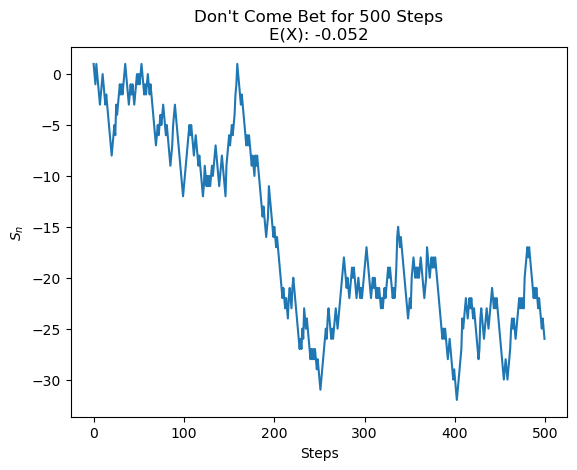

In [46]:
analyzeBet("Don't Come Bet", dontComeBet, 500)

### Other ways of betting

Bets on other bets that don't require relying on craps game

In [211]:
# -- any (next) roll --
# field: 
#    (2x/3x win) 2, 12
#    (win) 3, 4, 9, 10, 11
#    (lose) 5, 6, 7, 8

# duplicate numbers:
#    (2, 2):
#    (3, 3):
#    (4, 4):
#    (5, 5):
# horn bets:
#    (1, 1):
#    (1, 2):
#    (5, 6):
#    (6, 6):
#    (all):
# any craps:
#    (win) 2, 3, 12
#    (lose) 4, 5, 6, 7, 8, 9, 10, 11
# any craps + e (C & E):
#    (win) 2, 3, 11, 12
#    (lose) 4, 5, 6, 7, 8, 9, 10
# big red:
#    (win) 7
#    (lose) 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

# -- first roll --
# pass line: 
#    (win) 7, 11
#    (lose) 2, 3, 12
#    (continues) if rolled anything else
# don't pass line: 
#    (win) 2, 3
#    (lose) 2, 3
#    (tie) 12
# pass line: continues if rolled anything else

# -- second roll --
# pass line: 
#    (win) rolled same dice as first
#    (lose) 7
#    (repeats) if rolled anything else
# don't pass line: 
#    (win) 7
#    (lose) rolled same dice as first
#    (repeats) if rolled anything else
# come: 
#    (win) if 7, 11
#    (lose) if rolled anything else
# odds:
#    (win) 4, 10
#    (win) 5, 9
#    (win) 6, 8

### Conclusion

#### True Odds
https://wizardofodds.com/games/craps/appendix/2/

Although the true theoretical odds of craps are already calculated, above. It was interesting to see the simulated monte carlo of the game of craps being played. Certainly, there are better ways to play than others and we were able to see a variance to the game being simulated over n rolls. Our simulations of the true theoretical probabilities and E(X) were very close and could be near perfect will even longer simulation.

Overall, no one can beat the house, they always have an advantage. If you were to bet, it's better to consider not how to bet in craps, but how long you will bet. Winning money is only possible in the short term. The only thing that can be benefited from gambling is the fun adreline rush that you get from losing your money.